# COMP4304 Final Project 
## Name: Ahmed Julkernain 
## MUN Student no: 202126082 

## presentation link: https://www.youtube.com/watch?v=AoPAT_XfNfM

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, IntSlider

In [2]:
df=pd.read_csv('open_gym.csv')

In [3]:
df

,open_gym_start,open_gym_end,open_gym_activity,group,facility_title,location,total_females,total_males,total_residents,total_non_residents,total
0,2011-01-02 09:00:00,2011-01-02 11:30:00,Badminton,Everyone,Bond Park Community Center,Sycamore Gymnasium,0,3,2,1,3
1,2011-01-02 10:00:00,2011-01-02 12:00:00,Volleyball,Adult,Bond Park Community Center,Magnolia Gymnasium,0,2,1,1,2
2,2011-01-03 18:00:00,2011-01-03 22:00:00,Volleyball,Adult,Bond Park Community Center,Sycamore Gymnasium,0,2,1,1,2
3,2011-01-04 12:00:00,2011-01-04 14:00:00,Basketball,Adult,Bond Park Community Center,Sycamore Gymnasium,0,1,1,0,1
4,2011-01-04 18:00:00,2011-01-04 21:30:00,Open Gym,Everyone,Herbert C. Young Community Center,Coach Kay Yow Court,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
14454,2019-12-30 15:30:00,2019-12-30 17:30:00,Basketball,Youth/Teen,Herbert C. Young Community Center,Court 2,0,1,1,0,1
14455,2019-12-31 08:30:00,2019-12-31 12:30:00,Pickleball,Everyone,Bond Park Community Center,Magnolia Gymnasium,7,5,10,2,12
14456,2019-12-31 09:00:00,2019-12-31 12:00:00,Pickleball,Everyone,Middle Creek Community Center,South Gym,10,13,9,14,23
14457,2019-12-31 12:00:00,2019-12-31 14:30:00,Pickleball,Everyone,Middle Creek Community Center,South Gym,13,13,16,10,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14459 entries, 0 to 14458
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   open_gym_start       14459 non-null  object
 1   open_gym_end         14459 non-null  object
 2   open_gym_activity    14459 non-null  object
 3   group                14459 non-null  object
 4   facility_title       14459 non-null  object
 5   location             14459 non-null  object
 6   total_females        14459 non-null  int64 
 7   total_males          14459 non-null  int64 
 8   total_residents      14459 non-null  int64 
 9   total_non_residents  14459 non-null  int64 
 10  total                14459 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


## Data Preprocessing 

In [5]:
#although the data is already in date time format, I am doing it again to ensure the data type is correct
df['open_gym_start']=pd.to_datetime(df['open_gym_start']) 
df['open_gym_end']=pd.to_datetime(df['open_gym_end']) 

In [6]:
df['duration_hours']=(df['open_gym_end']-df['open_gym_start']).dt.total_seconds()/3600        

### Encode the data

In [7]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder() 
#we need to encode all the categorical data 
df_encoded=df.copy()

categorical_columns=['open_gym_activity','group','facility_title','location']
for c in categorical_columns:
    df_encoded[c]=le.fit_transform(df_encoded[c])

df_encoded

,open_gym_start,open_gym_end,open_gym_activity,group,facility_title,location,total_females,total_males,total_residents,total_non_residents,total,duration_hours
0,2011-01-02 09:00:00,2011-01-02 11:30:00,0,1,0,37,0,3,2,1,3,2.5
1,2011-01-02 10:00:00,2011-01-02 12:00:00,8,0,0,14,0,2,1,1,2,2.0
2,2011-01-03 18:00:00,2011-01-03 22:00:00,8,0,0,37,0,2,1,1,2,4.0
3,2011-01-04 12:00:00,2011-01-04 14:00:00,1,0,0,37,0,1,1,0,1,2.0
4,2011-01-04 18:00:00,2011-01-04 21:30:00,3,1,2,4,1,1,2,0,2,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
14454,2019-12-30 15:30:00,2019-12-30 17:30:00,1,4,2,9,0,1,1,0,1,2.0
14455,2019-12-31 08:30:00,2019-12-31 12:30:00,5,1,0,14,7,5,10,2,12,4.0
14456,2019-12-31 09:00:00,2019-12-31 12:00:00,5,1,3,24,10,13,9,14,23,3.0
14457,2019-12-31 12:00:00,2019-12-31 14:30:00,5,1,3,24,13,13,16,10,26,2.5


### Train a decision tree model for Feature Importance for total number of attendees

In [8]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split

feature_col=['open_gym_activity','group','facility_title','location','duration_hours','total_females','total_males','total_residents','total_non_residents']

X=df_encoded[feature_col] 
y=df_encoded['total'] 

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

decision_tree=DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train,y_train) 

feature_importance=decision_tree.feature_importances_ 


feature_importance_df=pd.DataFrame({'Factor':feature_col,'Importance': feature_importance}) 
feature_importance_df.sort_values(by='Importance',ascending=False)



,Factor,Importance
7,total_residents,0.942584
8,total_non_residents,0.054903
6,total_males,0.002141
5,total_females,0.000204
4,duration_hours,0.000158
3,location,0.000004
0,open_gym_activity,0.000003
2,facility_title,0.000002
1,group,0.000002


### Train a decision tree model to find out what features influence the activity chosen

In [9]:
#first extract time of day 

df_encoded['hour_of_day']=df_encoded['open_gym_start'].dt.hour
df_encoded 

def categorize_time(hour): 
    if 5<=hour<12:
        return 'Morning'
    elif 12 <= hour <17:
        return 'Afternoon'
    elif 17<=hour<21:
        return 'Evening'
    else:
        return 'Night'

df_encoded['Time_of_day']=df_encoded['hour_of_day'].apply(categorize_time)
df_encoded

,open_gym_start,open_gym_end,open_gym_activity,group,facility_title,location,total_females,total_males,total_residents,total_non_residents,total,duration_hours,hour_of_day,Time_of_day
0,2011-01-02 09:00:00,2011-01-02 11:30:00,0,1,0,37,0,3,2,1,3,2.5,9,Morning
1,2011-01-02 10:00:00,2011-01-02 12:00:00,8,0,0,14,0,2,1,1,2,2.0,10,Morning
2,2011-01-03 18:00:00,2011-01-03 22:00:00,8,0,0,37,0,2,1,1,2,4.0,18,Evening
3,2011-01-04 12:00:00,2011-01-04 14:00:00,1,0,0,37,0,1,1,0,1,2.0,12,Afternoon
4,2011-01-04 18:00:00,2011-01-04 21:30:00,3,1,2,4,1,1,2,0,2,3.5,18,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14454,2019-12-30 15:30:00,2019-12-30 17:30:00,1,4,2,9,0,1,1,0,1,2.0,15,Afternoon
14455,2019-12-31 08:30:00,2019-12-31 12:30:00,5,1,0,14,7,5,10,2,12,4.0,8,Morning
14456,2019-12-31 09:00:00,2019-12-31 12:00:00,5,1,3,24,10,13,9,14,23,3.0,9,Morning
14457,2019-12-31 12:00:00,2019-12-31 14:30:00,5,1,3,24,13,13,16,10,26,2.5,12,Afternoon


In [10]:
#encode time of day coloum 
from sklearn.tree import DecisionTreeClassifier
df_encoded['Time_of_day']=le.fit_transform(df_encoded['Time_of_day'])

feature_col1=['group','facility_title','location','duration_hours','Time_of_day','total_females','total_males','total_residents','total_non_residents','total']

X1=df_encoded[feature_col1] 
y1=df_encoded['open_gym_activity'] 

X_train1, X_test1, y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=42)

decision_tree_classifier=DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train1,y_train1) 

feature_importance1=decision_tree_classifier.feature_importances_ 


feature_importance_df1=pd.DataFrame({'Factor':feature_col1,'Importance': feature_importance1}) 
feature_importance_df1.sort_values(by='Importance',ascending=False)



,Factor,Importance
0,group,0.385167
2,location,0.188415
1,facility_title,0.152379
6,total_males,0.103013
9,total,0.070661
5,total_females,0.034599
3,duration_hours,0.026138
4,Time_of_day,0.018918
7,total_residents,0.012744
8,total_non_residents,0.007966


In [12]:
@interact(
    feature_set=['Activity Type', 'Attendance'],
    top_n=IntSlider(min=1, max=10, step=1, value=8, description='Factors:')
)
def plot_feature_importance(feature_set, top_n):
    if feature_set=='Attendance':
        data=feature_importance_df
        title='What effects the Total Number of Attendees'
        palette='crest'
    else:
        data=feature_importance_df1
        title='What effects the Type of Activity Chosen?'
        palette='crest'

    sorted_data=data.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1) 
    barplot = sns.barplot(x='Importance', y='Factor', data=sorted_data.head(top_n), hue='Factor', palette=palette, saturation=0.7, dodge=False)
    plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('#f9f9f9')
    plt.gca().set_xlim([0, sorted_data['Importance'].max()])
    plt.title(title, fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tick_params(axis='y', left=False)

    for p in barplot.patches: #the following two lines of code has been tweaked from what Chatgpt gave me as my original code for annotating was not working.
        barplot.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.01, p.get_y() + p.get_height() / 2),
                         ha='center', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

    plt.subplot(1, 2, 2)
    top_feature_importance=sorted_data['Importance'].iloc[0]
    others_sum=sorted_data['Importance'][1:].sum()
    pie_data= pd.DataFrame({
        'Factor': ['Most Influential Factor', 'Others'],
        'Importance': [top_feature_importance, others_sum]
    })

    plt.pie(pie_data['Importance'], labels=pie_data['Factor'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette, 2), explode=[0.1, 0])
    #autopct and explode are from chatgpt
    plt.title('Proportion of Most Influential Factor vs Others', fontsize=16)

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='feature_set', options=('Activity Type', 'Attendance'), value='Acti…

Text(0.5, 1.1, 'Annual Comparison of Resident and Non-Resident Participation in Open Gym Activities')

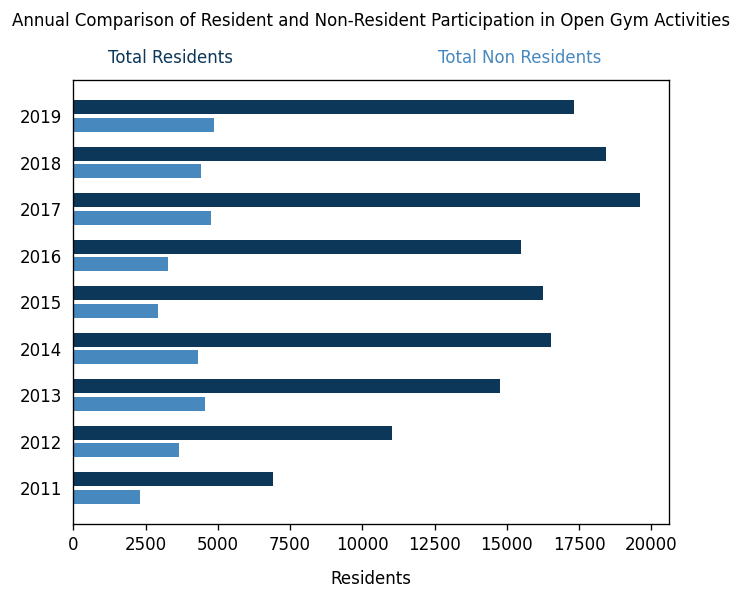

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib import colors

gym_df = pd.read_csv('open_gym.csv')
gym_df["year_of_occurrence"] = pd.to_datetime(gym_df["open_gym_start"]).dt.year
gym_df = gym_df[['year_of_occurrence', 'total_residents', 'total_non_residents']]
gym_df = gym_df.groupby('year_of_occurrence').sum().reset_index()

fig, ax = plt.subplots(dpi = 120)
y_index = np.arange(len(gym_df['year_of_occurrence']))

width = 0.3
gap = 0.3

ax.barh(y_index + gap/1.6, gym_df['total_residents'], width, label='Total Residents', color='#0c3759')
ax.barh(y_index - gap/1.6, gym_df['total_non_residents'], width, label='Total Non Residents', color='#4789be')

ax.set_xlabel('Residents', labelpad=10)

ax.set_yticks(y_index) 
ax.set_yticklabels(gym_df['year_of_occurrence'])
ax.tick_params(axis='y', left=False)
fig.text(0.17, 0.91, "Total Residents", color='#0c3759')
fig.text(0.6, 0.91, "Total Non Residents", color='#4789be')

ax.set_title("Annual Comparison of Resident and Non-Resident Participation in Open Gym Activities", fontsize= 10, y = 1.1)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from matplotlib import colors
from ipywidgets import interact, IntRangeSlider

days = ["All", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_the_week_dropdown = widgets.Dropdown(options=days, value='All', description='Week Day')

@interact(day_of_the_week= day_of_the_week_dropdown, hour_range=IntRangeSlider(min=8, max=20, step=1, value=[8, 20], description='Hour Range'))

def f(day_of_the_week, hour_range):
    gym_time_df = pd.read_csv('open_gym.csv')
    gym_time_df['open_gym_start'] = pd.to_datetime(gym_time_df['open_gym_start'])
    gym_time_df['gym_hour'] = gym_time_df['open_gym_start'].dt.hour
    gym_time_df['weekday'] = gym_time_df['open_gym_start'].dt.day_name()
    gym_time_df = gym_time_df.groupby(['weekday', 'gym_hour'])['total'].sum().reset_index()
    gym_time_df = gym_time_df.pivot(index='weekday', columns='gym_hour', values='total')
    gym_time_df.columns = [f"{hour%12 if hour%12 else 12} {'AM' if hour < 12 else 'PM'}" for hour in gym_time_df.columns]
    gym_time_df = gym_time_df.fillna(0)
    gym_time_df = gym_time_df.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    
    if(day_of_the_week != 'All'):
        gym_time_df = gym_time_df.loc[[day_of_the_week]]

    selected_hours = [f"{hour%12 if hour%12 else 12} {'AM' if hour < 12 else 'PM'}" for hour in range(hour_range[0], hour_range[1] + 1)]
    gym_time_df = gym_time_df[selected_hours]

    cmap = plt.get_cmap("Greens", 20) 
    plt.figure(figsize=(10, 7), dpi = 100)
    ax = sns.heatmap(data=gym_time_df, cmap=cmap, cbar_kws={'location': 'top', 'ticks': [gym_time_df.min().min(), gym_time_df.max().max()], 'shrink': 0.4, 'aspect': 11})
    for y in range(gym_time_df.shape[0]):
        ax.hlines(y + 1, *ax.get_xlim(), colors='white', linewidths= 1.5)

    cbar = ax.collections[0].colorbar
    cbar.set_ticks([gym_time_df.min().min(), gym_time_df.max().max()])
    cbar.set_ticklabels(['Quiet', 'Busy'])
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(0.3)
    cbar.ax.tick_params(size=0) 

    plt.tick_params(axis='x', bottom=False)
    plt.tick_params(axis='y', left=False, pad= 2)
    ax.set_ylabel('')

    plt.title('Peak Hours Unveiled: When Does Everyone\nPrefer to Participate in Open Gym?', fontsize=16, fontweight='bold', pad=80)
    plt.show()

interactive(children=(Dropdown(description='Week Day', options=('All', 'Monday', 'Tuesday', 'Wednesday', 'Thur…

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from matplotlib import colors
from ipywidgets import interact, IntRangeSlider
import plotly.express as px

gym_df = pd.read_csv('open_gym.csv')
gym_df = gym_df[['open_gym_activity', 'group', 'total']]
gym_df.rename(columns={'group': 'Group'}, inplace=True)

aggregated_data = gym_df.groupby(['open_gym_activity', 'Group']).sum().reset_index()
pivot_df = aggregated_data.pivot_table(index='Group', columns='open_gym_activity', values='total', fill_value=0.0)


columns_order = ['Badminton', 'Basketball', 'Homeschool', 'Open Gym', 'Open Studio', 'Pickleball', 'Preschool', 'Table Tennis', 'Volleyball']
pivot_df = pivot_df.reindex(columns=columns_order)
pivot_df.reset_index(inplace=True)


df = pivot_df.melt(id_vars=['Group'], var_name='Activity', value_name='Participants')

fig = px.scatter(df, x="Activity", y="Group",
                 size="Participants", color="Group",
                 hover_name="Group", size_max= 62, title="Open Gym Activity Participation by Group",
                 width=1000, height= 630) 

fig.update_layout(xaxis_title="Activity", yaxis_title="")
fig.update_layout(xaxis=dict(tickangle= -45))
fig.update_layout(title=dict(x=0.5, y=0.9, xanchor='center', yanchor='top'))

fig.show()